In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
PATH = "../data/Prevalence_Sex_Age_ICD.csv"
PATH_DEGREE_PREVALENCE = "../data/Degree_Prevalence_ICD.csv"

In [3]:
df_colors = pd.read_csv('../data/icd_colors.csv')
df_colors.head()

,Hex,Letter
0,#1AF239,A
1,#58F21A,B
2,#961D1A,C
3,#B41AF2,D
4,#FFCA01,E


In [4]:
df_degree = pd.read_csv(PATH_DEGREE_PREVALENCE)
df_degree.head()

,Sex,Age_Group,ICD_Code,ICD_Description,Degree,Prevalence,Age_Index,Ratio,Log_ratio,Deviation,Outlier
0,Male,age_1,A01,Typhoid and paratyphoid fevers,0,0.00011,1,0.000000,NaN,NaN,False
1,Male,age_1,A02,Other salmonella infections,2,0.00172,1,1162.790698,3.065502,-1.106401,False
2,Male,age_1,A03,Shigellosis,0,0.00003,1,0.000000,NaN,NaN,False
3,Male,age_1,A04,Other bacterial intestinal infections,6,0.00402,1,1492.537313,3.173925,-0.944843,False
4,Male,age_1,A05,"Oth bacterial foodborne intoxications, NEC",0,0.00006,1,0.000000,NaN,NaN,False


In [7]:
df = pd.read_csv(PATH)
df.head()

,sex,Age_Group,icd_code,p
0,Female,0-9,A01,0.00012
1,Female,0-9,A02,0.00623
2,Female,0-9,A03,0.00009
3,Female,0-9,A04,0.00702
4,Female,0-9,A05,0.00019


In [13]:
df_degree['key'] = df_degree['ICD_Code'].str[0]

In [14]:
result_df = pd.merge(df_degree, df_colors, left_on='key', right_on='Letter', how='left')


In [17]:
result_df

,Sex,Age_Group,ICD_Code,ICD_Description,Degree,Prevalence,Age_Index,Ratio,Log_ratio,Deviation,Outlier,key,Hex,Letter
0,Male,age_1,A01,Typhoid and paratyphoid fevers,0,0.00011,1,0.000000,NaN,NaN,False,A,#1AF239,A
1,Male,age_1,A02,Other salmonella infections,2,0.00172,1,1162.790698,3.065502,-1.106401,False,A,#1AF239,A
2,Male,age_1,A03,Shigellosis,0,0.00003,1,0.000000,NaN,NaN,False,A,#1AF239,A
3,Male,age_1,A04,Other bacterial intestinal infections,6,0.00402,1,1492.537313,3.173925,-0.944843,False,A,#1AF239,A
4,Male,age_1,A05,"Oth bacterial foodborne intoxications, NEC",0,0.00006,1,0.000000,NaN,NaN,False,A,#1AF239,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14704,Female,age_8,N93,Other abnormal uterine and vaginal bleeding,0,0.00023,8,0.000000,NaN,NaN,False,N,#1AF2F2,N
14705,Female,age_8,N94,Pain and oth cond assoc w fem gntl org and men...,0,0.00008,8,0.000000,NaN,NaN,False,N,#1AF2F2,N
14706,Female,age_8,N95,Menopausal and other perimenopausal disorders,12,0.00476,8,2521.008403,3.401574,-0.605631,False,N,#1AF2F2,N
14707,Female,age_8,N97,Female infertility,0,0.00004,8,0.000000,NaN,NaN,False,N,#1AF2F2,N


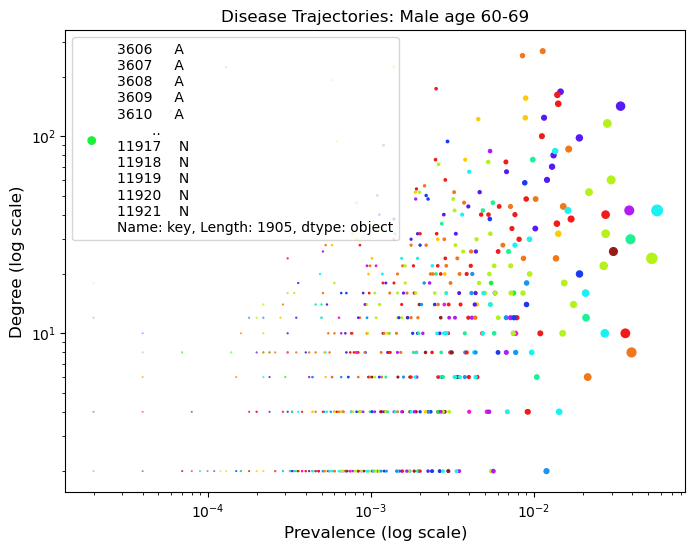

In [ ]:
plt.figure(figsize=(8, 6))
df_age = result_df[result_df['Age_Index'] == 5]
scatter = plt.scatter(df_age['Prevalence'], df_age['Degree'], s=df_age['Prevalence']*1000,c=df_age['Hex'],label=df_age['key']) # s is the marker size
plt.xlabel('Prevalence (log scale)',fontsize=12)
plt.ylabel('Degree (log scale)',fontsize=12)
plt.title('Disease Trajectories: Male age 60-69')
plt.xscale('log')
plt.yscale('log')

In [8]:
df = df[df['Age_Group']=='60-69']
df = df[df['sex'] == 'Male']

In [9]:
df.head()

,sex,Age_Group,icd_code,p
13759,Male,60-69,A01,0.00004
13760,Male,60-69,A02,0.00067
13761,Male,60-69,A04,0.00324
13762,Male,60-69,A05,0.00011
13763,Male,60-69,A06,0.00008


In [38]:
df['Color'] = df['icd_code'].str[0] 
join_color = df.join(colors,lsuffix='Color',rsuffix='Letter')

In [39]:
join_color['Hex'].unique

<bound method Series.unique of 13759    NaN
13760    NaN
13761    NaN
13762    NaN
13763    NaN
        ... 
14739    NaN
14740    NaN
14741    NaN
14742    NaN
14743    NaN
Name: Hex, Length: 985, dtype: object>

KeyError: 'Hex'

In [10]:
join_df = df.join(df_degree,lsuffix='ICD_Code',rsuffix='icd_code')

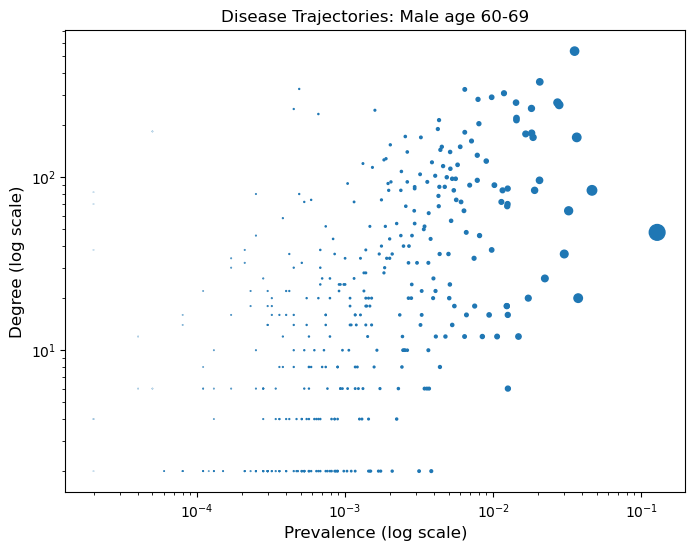

In [42]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(join_df['Prevalence'], join_df['Degree'], s=join_df['Prevalence']*1000,label=join_df['icd_code']) # s is the marker size
plt.xlabel('Prevalence (log scale)',fontsize=12)
plt.ylabel('Degree (log scale)',fontsize=12)
plt.title('Disease Trajectories: Male age 60-69')
plt.xscale('log')
plt.yscale('log')